<a href="https://colab.research.google.com/github/aisha-colab/Machine-learning-models/blob/main/generalize_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
local_zip = '/content/drive/MyDrive/airlab.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Sequential
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split 
from sklearn import metrics

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/airlab/2DS_rospla'
#input_folder = '/content/airlab/HVPS'

splitfolders.ratio(input_folder, output='2DS_rospla', seed=42, ratio=(.7, .2, .1), group_prefix=None)


#splitfolders.ratio(input_folder, output='HVPS', seed=42, ratio=(.7, .2, .1), group_prefix=None)

Copying files: 4190 files [00:01, 3902.03 files/s]


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_data_path = '/content/2DS_rospla/train'
valid_data_path = '/content/2DS_rospla/val'
test_data_path = '/content/2DS_rospla/test'


#train_data_path = '/content/HVPS/train'
#valid_data_path = '/content/HVPS/val'
#test_data_path = '/content/HVPS/test'





In [ ]:
# Define Input Parameters
shape = (224, 224)
channel = (3, )
input_size = shape + channel

#batch size
batch_size = 32

#using th ebelow lines of coeds for the HVPS as the path metioned below are for HVPS

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                 rotation_range = 30, 
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

test_datagen =  ImageDataGenerator(rescale = 1. / 255,
                                  horizontal_flip = True)

train_gen = train_datagen.flow_from_directory('/content/HVPS/train',
                                            target_size = shape,
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

val_gen = test_datagen.flow_from_directory('/content/HVPS/val',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

test_gen= test_datagen.flow_from_directory('/content/HVPS/test/',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

Found 2858 images belonging to 7 classes.
Found 821 images belonging to 7 classes.
Found 421 images belonging to 7 classes.


Using the below codes of line for 2D-S arumentaion

using th ebelow lines of coeds for the HVPS as the path metioned below are for 2D-S

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                 rotation_range = 30, 
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

test_datagen =  ImageDataGenerator(rescale = 1. / 255,
                                  horizontal_flip = True)

train_gen = train_datagen.flow_from_directory('/content/2DS_rospla/train/',
                                            target_size = shape,
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

val_gen = test_datagen.flow_from_directory('/content/2DS_rospla/val',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

test_gen= test_datagen.flow_from_directory('/content/2DS_rospla/test/',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

Found 2858 images belonging to 7 classes.
Found 821 images belonging to 7 classes.
Found 421 images belonging to 7 classes.


In [ ]:
num_class = test_gen.num_classes
label_class = train_gen.class_indices

print(label_class)

{'2D-S Other (OT)': 0, 'Aggregate (AG)': 1, 'Bullet Rosette (BR)': 2, 'Columnar Crystal (CC)': 3, 'Compact particle (CP)': 4, 'Planar crystal (PC)': 5, 'Quasi-sphere (QS)': 6}


In [ ]:
base_model = Xception(include_top=False, weights='imagenet', input_tensor=None, 
                      input_shape=input_size, pooling=max, classes=num_class,
                      classifier_activation='softmax')

# adding custom layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation = 'softmax'))

base_model.trainable = False

model.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 21,387,823
Trainable params: 526,343
Non-tr

In [ ]:
model.compile(optimizer = Adam(),
             loss="categorical_crossentropy",
             metrics=["acc"])

base_path = 'train_model'
trained_model_path = base_path + 'HVPS_model/'
#trained_model_path = base_path + '2D-S_model/'
model_names = trained_model_path + '.{epoch:02d}-{val_acc:.2f}.h5'

earlystopping = EarlyStopping(monitor ="val_loss", 
                              mode = "auto", patience = 15, 
                              restore_best_weights = True)

checkpoint = ModelCheckpoint(model_names, monitor = 'val_loss',
                             mode = 'auto', verbose = 1,
                             save_best_only = True)

history = model.fit(train_gen,
                    steps_per_epoch = len(train_gen),
                    validation_data = val_gen,
                    validation_steps = len(val_gen),
                    epochs = 100, verbose = 1, callbacks=[checkpoint, earlystopping])

Epoch 1/100
90/90 [==============================] - ETA: 0s - loss: 0.8659 - acc: 0.6938
Epoch 1: val_loss improved from inf to 0.54331, saving model to train_modelHVPS_model/.01-0.81.h5
90/90 [==============================] - 56s 475ms/step - loss: 0.8659 - acc: 0.6938 - val_loss: 0.5433 - val_acc: 0.8100
Epoch 2/100
90/90 [==============================] - ETA: 0s - loss: 0.6088 - acc: 0.7852
Epoch 2: val_loss improved from 0.54331 to 0.48240, saving model to train_modelHVPS_model/.02-0.84.h5
90/90 [==============================] - 44s 485ms/step - loss: 0.6088 - acc: 0.7852 - val_loss: 0.4824 - val_acc: 0.8404
Epoch 3/100
90/90 [==============================] - ETA: 0s - loss: 0.5592 - acc: 0.8132
Epoch 3: val_loss improved from 0.48240 to 0.45965, saving model to train_modelHVPS_model/.03-0.85.h5
90/90 [==============================] - 39s 439ms/step - loss: 0.5592 - acc: 0.8132 - val_loss: 0.4597 - val_acc: 0.8502
Epoch 4/100
90/90 [==============================] - ETA: 0s -

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

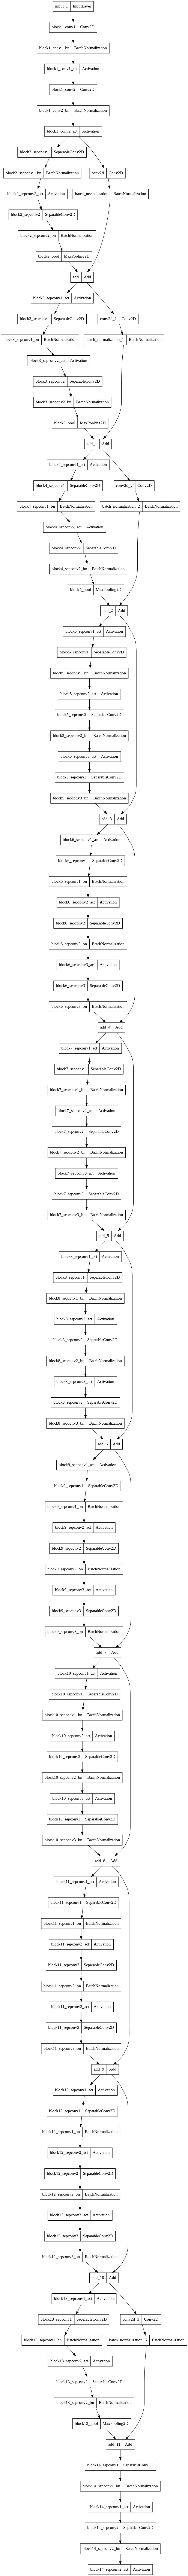

In [ ]:
plot_model(base_model, to_file='xception_model_2DS.jpg')

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 90.26%
[INFO] Loss:  0.30022093653678894


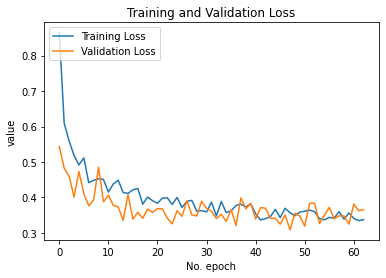

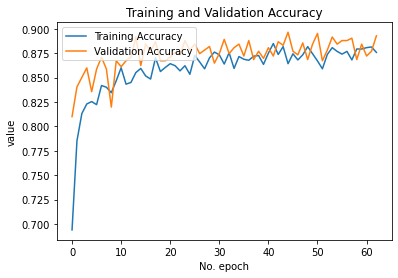

In [ ]:
history.history['loss']
history.history['acc']

plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc = "upper left")
plt.show()

plt.plot(history.history['acc'], label = 'Training Accuracy')
plt.plot(history.history['val_acc'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['2D-S Other (OT)', 'Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Planar crystal (PC)', 'Quasi-sphere (QS)']


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import itertools

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


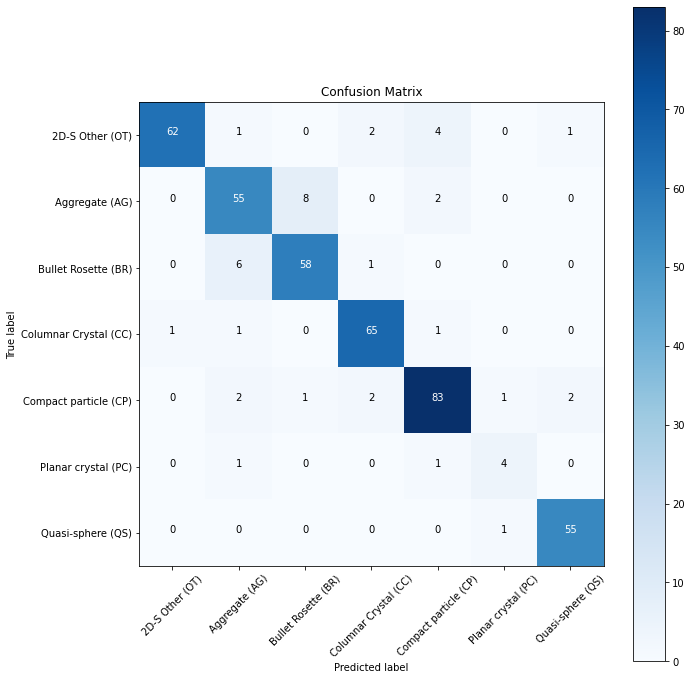

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

      2D-S Other (OT)       0.98      0.89      0.93        70
       Aggregate (AG)       0.83      0.85      0.84        65
  Bullet Rosette (BR)       0.87      0.89      0.88        65
Columnar Crystal (CC)       0.93      0.96      0.94        68
Compact particle (CP)       0.91      0.91      0.91        91
  Planar crystal (PC)       0.67      0.67      0.67         6
    Quasi-sphere (QS)       0.95      0.98      0.96        56

             accuracy                           0.91       421
            macro avg       0.88      0.88      0.88       421
         weighted avg       0.91      0.91      0.91       421



In [ ]:
#Save the model for 2D-S
model.save("Xception2DS_genra.hdf5")
#MOD


In [ ]:
#Save the model for HVPS
model.save("XceptionHVPS_genra.hdf5")